In [3]:
import pickle
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib.animation as animation
import pickle
import pandas as pd

In [4]:
# Assuming G is your NetworkX graph
def print_first_three_nodes_and_edges(G):
    # First 3 nodes
    print("First 3 Nodes and their features:")
    for node, data in list(G.nodes(data=True))[:3]:
        print(f"Node: {node}, Features: {data}")

    # First 3 edges
    print("\nFirst 3 Edges and their features:")
    for u, v, data in list(G.edges(data=True))[:3]:
        print(f"Edge: ({u}, {v}), Features: {data}")

# Example usage


# Load Ashish Graphs

In [196]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\orije\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [398]:
df1=pd.read_csv(r"C:\Users\orije\Urban-Rail-Network-Resilience-Failure-Recovery-\Delhi_Metro\Edge_CSV.csv")
edge_list_W = list(zip(df1['Source'], df1['Target']))
agg_G = nx.Graph()
agg_G.add_edges_from(edge_list_W)

print("Number of nodes:", agg_G.number_of_nodes())
print("Number of edges:", agg_G.number_of_edges())

Number of nodes: 205
Number of edges: 216


## Load Comms physics graphs

In [5]:
# Load the graph from the pickle file
with open(rf"C:\Users\orije\recoverability\spaces\L\L-Amsterdam.pkl", 'rb') as file:
    bos_G = pickle.load(file)
import networkx as nx



# Manually create an undirected graph
agg_G = nx.Graph()
agg_G.add_nodes_from(bos_G.nodes(data=True))
# Add edges to the undirected graph
for u, v in bos_G.edges():
    if not agg_G.has_edge(u, v) and not agg_G.has_edge(v, u):
        agg_G.add_edge(u, v)

In [6]:
sigma=1

In [7]:
G=copy.deepcopy(agg_G)

In [8]:
nodes_to_remove=np.random.choice(list(agg_G.nodes()), size=int(sigma*len(agg_G)), replace=False)

In [9]:
nodes_to_remove

array([34,  1, 38,  0, 19,  6, 14, 26, 23, 15, 13, 27,  3,  8,  9, 16, 22,
       25, 31, 18, 28, 33, 37, 21,  2, 12, 24, 30, 35, 29, 10,  5, 36, 20,
       17,  4,  7, 32, 11])

In [10]:
import time
import itertools

In [11]:
def calculate_network_performance(G):
    # sd = dict(nx.shortest_path_length(G))

    if G.number_of_nodes() == 0:  # Handle the case when the graph is empty
        return 0

    gc_size = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)][0]
    
    return gc_size




In [12]:
# Degree based recovery

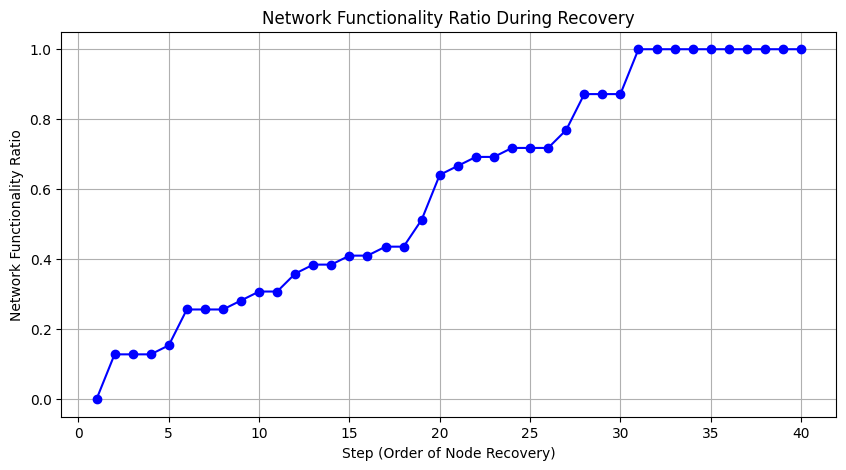

Time taken in Degree Recovery: 0.0030410289764404297


In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import matplotlib.animation as animation


nodes_by_degree=[]
# Function to simulate  recovery, also returns performance data


# Function to simulate recovery, also returns performance data
def simulate_recovery_degree(G, nodes_to_remove):
    # H = copy.deepcopy(G)
    # H.remove_nodes_from(nodes_to_remove)
    seq_added_degree = []

    H = nx.Graph()
    recovery_performance = [0]
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = [calculate_network_performance(H) / initial_performance]
    degree_centrality = nx.degree_centrality(G)
    nodes_sorted_by_degree = sorted(nodes_to_remove, key=lambda n: degree_centrality[n], reverse=True)
    i = 1
    for node in nodes_sorted_by_degree:
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_degree.append(node)
        
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        i += 1
    
    return recovery_performance, seq_added_degree


# Function to plot functionality ratios
def plot_functionality_ratio(recovery_performance):
    plt.figure(figsize=(10, 5))
    steps = list(range(1, len(recovery_performance) + 1))
    plt.plot(steps, recovery_performance, marker='o', linestyle='-', color='blue')
    plt.title('Network Functionality Ratio During Recovery')
    plt.xlabel('Step (Order of Node Recovery)')
    plt.ylabel('Network Functionality Ratio')
    plt.grid(True)
    plt.show()

# Measure execution time and plot performance
start_time = time.time()
recovery_performance_degree, seq_added_degree = simulate_recovery_degree(agg_G, nodes_to_remove)
end_time = time.time()
time_taken_degree = end_time - start_time

plot_functionality_ratio(recovery_performance_degree)
print("Time taken in Degree Recovery:", time_taken_degree)



In [14]:
#Betweeness

In [15]:
print("Number of nodes:", agg_G.number_of_nodes())
print("Number of edges:", agg_G.number_of_edges())

Number of nodes: 39
Number of edges: 40


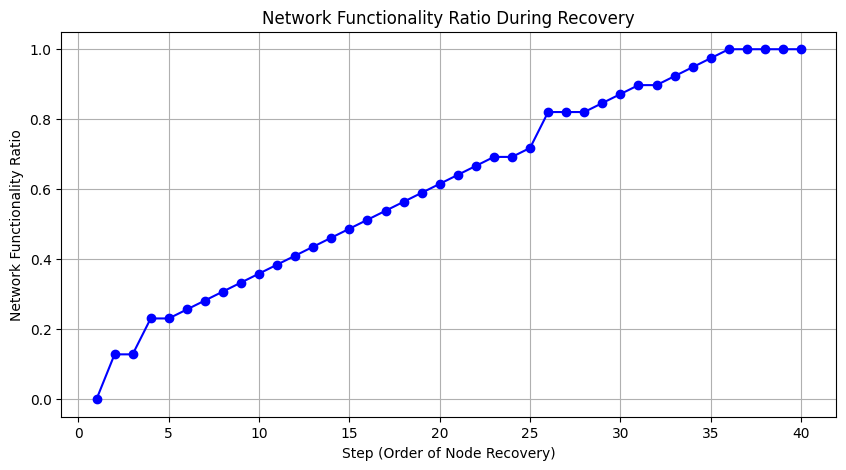

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy


nodes_by_betweenness=[]
def simulate_recovery_betweenness(G, recovery_measure='betweenness'):
    H = nx.Graph()  # Start with an empty graph
    seq_added_betweenness=[]
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = []
    recovery_performance=[calculate_network_performance(H)/initial_performance]
    # Obtain betweenness centrality for the original graph
    betweenness = nx.betweenness_centrality(G)
    
    if recovery_measure == 'betweenness':
        nodes_sorted_by_betweenness = sorted(nodes_to_remove, key=lambda n: betweenness[n], reverse=True)
    else:
        raise ValueError("Invalid recovery measure. Use 'betweenness'.")
    for index, node in enumerate(nodes_sorted_by_betweenness):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_betweenness.append(node)
        
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
    
    return recovery_performance, seq_added_betweenness


start_time=time.time()
recovery_performance_betweenness, seq_added_betweenness = simulate_recovery_betweenness(agg_G)
end_time=time.time()
time_taken_betweenness=end_time-start_time
plot_functionality_ratio(recovery_performance_betweenness)

In [17]:
#Greedy

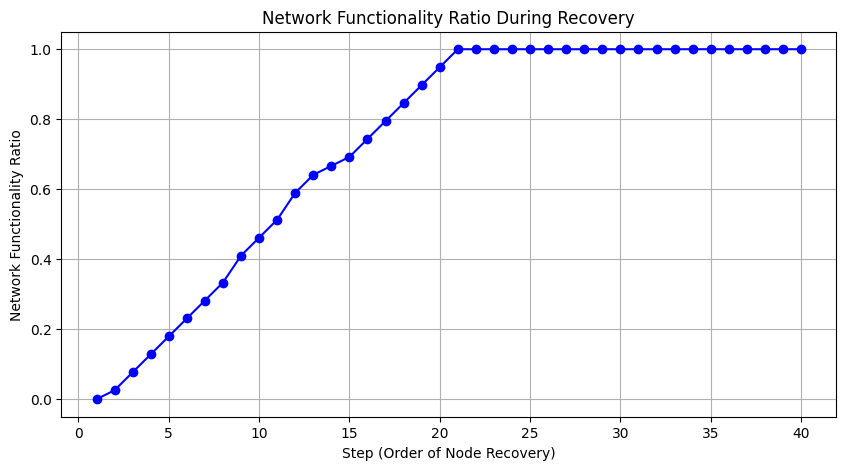

In [18]:
nodes_by_greedy = []

# Unified greedy recovery function
def simulate_recovery_greedy(G, nodes_to_remove):
    centrality = {n: G.degree[n] for n in G.nodes()}  # You can choose any centrality measure if needed
    nodes_sorted_by_centrality = sorted(nodes_to_remove, key=lambda n: centrality[n], reverse=True)
    
    H = nx.Graph()  # Start with an empty graph
    
    initial_performance = calculate_network_performance(G)
    recovery_performance = [0]  # Initial performance is zero since H is empty
    node_sequence = []
    
    remaining_nodes = set(nodes_to_remove)
    while remaining_nodes:
        best_performance = float('-inf')
        best_node = None

        # Test recovery for each remaining node
        for node in remaining_nodes:
            test_graph = copy.deepcopy(H)
            test_graph.add_node(node)
            # Reconnect with neighbors that are still in the graph
            for neighbor in G.neighbors(node):
                if neighbor in test_graph:
                    test_graph.add_edge(node, neighbor)

            # Calculate performance if this node were added back
            test_performance = calculate_network_performance(test_graph)
            if test_performance > best_performance:
                best_performance = test_performance
                best_node = node

        # Add the best node back to H for real
        if best_node is not None:
            H.add_node(best_node, **G.nodes[best_node])
            H.add_edges_from(list(G.edges(best_node)))
            node_sequence.append(best_node)
            functionality_ratio = best_performance / initial_performance
            recovery_performance.append(functionality_ratio)
            remaining_nodes.remove(best_node)

    return recovery_performance, node_sequence


start_time=time.time()
recovery_performance_greedy, seq_added_greedy = simulate_recovery_greedy(agg_G, nodes_to_remove)
end_time=time.time()
time_taken_greedy=end_time-start_time
plot_functionality_ratio(recovery_performance_greedy)

In [19]:
#Random

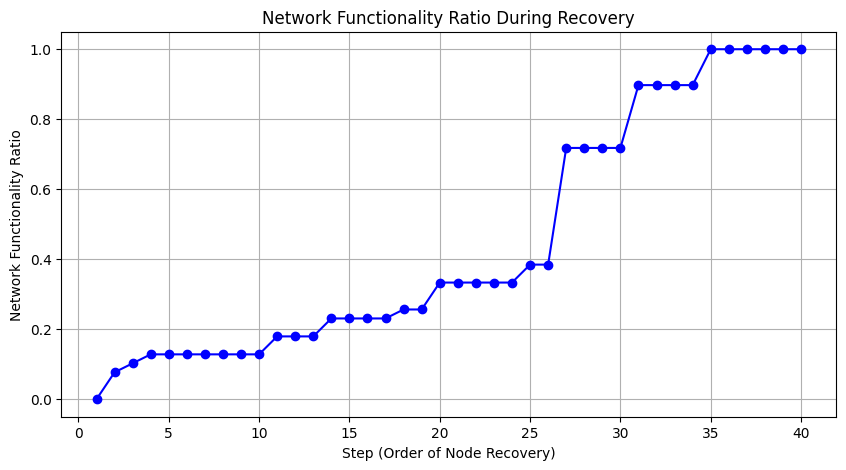

In [20]:
nodes_by_random=[]
def simulate_recovery_random(G, nodes_to_remove):
    H = nx.Graph()
    seq_added_random=[]
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = []
    recovery_performance=[calculate_network_performance(H)/initial_performance]
    nodes_shuffled = np.random.permutation(nodes_to_remove)
    nodes_sorted_by_random=nodes_shuffled
    for index, node in enumerate(nodes_shuffled):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_random.append(node)

        current_performance = calculate_network_performance(H)
        # nodes_by_random.append((node, G.nodes[node]['name']))
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        #print(f'Functionality after recovering node {index + 1} ({node}): {functionality_ratio}')

    return recovery_performance, seq_added_random

start_time=time.time()
recovery_performance_random, seq_added_random = simulate_recovery_random(agg_G, nodes_to_remove)
end_time=time.time()
time_taken_random=end_time-start_time
plot_functionality_ratio(recovery_performance_random)

In [21]:
#Eigen

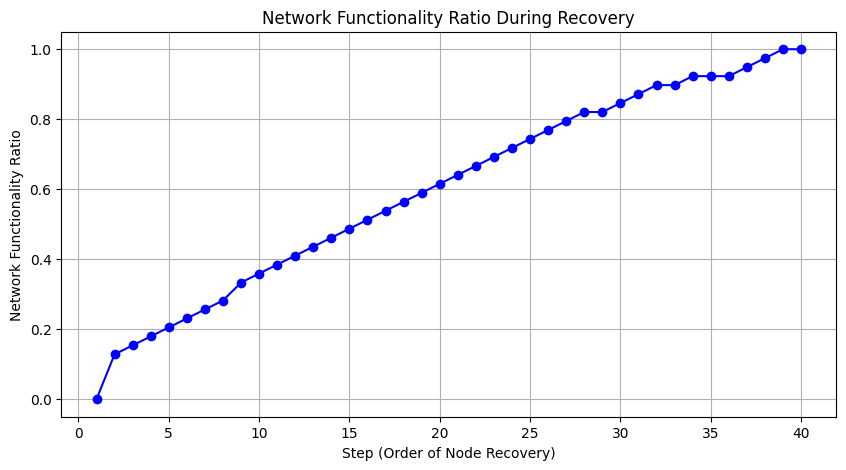

In [22]:
nodes_by_eigen=[]
def simulate_recovery_eigen(G, nodes_to_remove):
    H = nx.Graph()  
    seq_added_eigen=[]
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = []
    recovery_performance=[calculate_network_performance(H)/initial_performance]
    # Try obtaining eigenvector centrality with more iterations and a higher tolerance
    try:
        centrality = nx.eigenvector_centrality(G, max_iter=5000, tol=1e-06)
    except nx.PowerIterationFailedConvergence:
        print("Eigenvector centrality failed to converge, trying with a random start vector.")
        nstart = {n: 1 for n in G.nodes()}  # Start with equal centrality assumption
        centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06, nstart=nstart)
    
    nodes_sorted_by_centrality = sorted(nodes_to_remove, key=lambda n: centrality[n], reverse=True)
    
    for index, node in enumerate(nodes_sorted_by_centrality):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_eigen.append(node)
        
        # Calculate current performance and functionality ratio
        # nodes_by_eigen.append((node, G.nodes[node]['name']))
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        #print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
    
    return recovery_performance, seq_added_eigen


def plot_functionality_ratio(recovery_performance):
    plt.figure(figsize=(10, 5))
    steps = list(range(1, len(recovery_performance) + 1))
    plt.plot(steps, recovery_performance, marker='o', linestyle='-', color='blue')
    plt.title('Network Functionality Ratio During Recovery')
    plt.xlabel('Step (Order of Node Recovery)')
    plt.ylabel('Network Functionality Ratio')
    plt.grid(True)
    plt.show()
start_time=time.time()
recovery_performance_eigen, seq_added_eigen = simulate_recovery_eigen(agg_G, nodes_to_remove)
end_time=time.time()
time_taken_eigen=end_time-start_time
plot_functionality_ratio(recovery_performance_eigen)

In [23]:
#Closeness

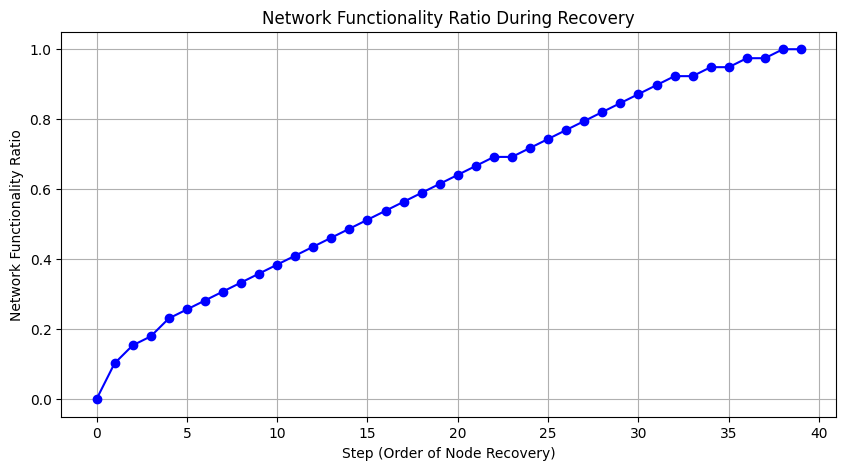

Time taken for recovery process: 0.00324249267578125 seconds


In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import copy
import time

def simulate_recovery_closeness(G, nodes_to_remove):
    H = nx.Graph()
    seq_added_closeness=[]
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = [calculate_network_performance(H) / initial_performance]
    
    # Calculate closeness centrality for the nodes
    centrality = nx.closeness_centrality(G)
    
    # Sort removed nodes by their centrality in descending order
    nodes_sorted_by_centrality = sorted(nodes_to_remove, key=lambda n: centrality.get(n, 0), reverse=True)
    
    for index, node in enumerate(nodes_sorted_by_centrality):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_closeness.append(node)
        
        # Calculate current performance and functionality ratio
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        #print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
    
    return recovery_performance, seq_added_closeness

def plot_functionality_ratio(recovery_performance):
    plt.figure(figsize=(10, 5))
    steps = list(range(len(recovery_performance)))
    plt.plot(steps, recovery_performance, marker='o', linestyle='-', color='blue')
    plt.title('Network Functionality Ratio During Recovery')
    plt.xlabel('Step (Order of Node Recovery)')
    plt.ylabel('Network Functionality Ratio')
    plt.grid(True)
    plt.show()

start_time = time.time()
recovery_performance_closeness, seq_added_closeness = simulate_recovery_closeness(agg_G, nodes_to_remove)
end_time = time.time()
time_taken_closeness = end_time - start_time

plot_functionality_ratio(recovery_performance_closeness)
print(f'Time taken for recovery process: {time_taken_closeness} seconds')


In [25]:
#PageRank

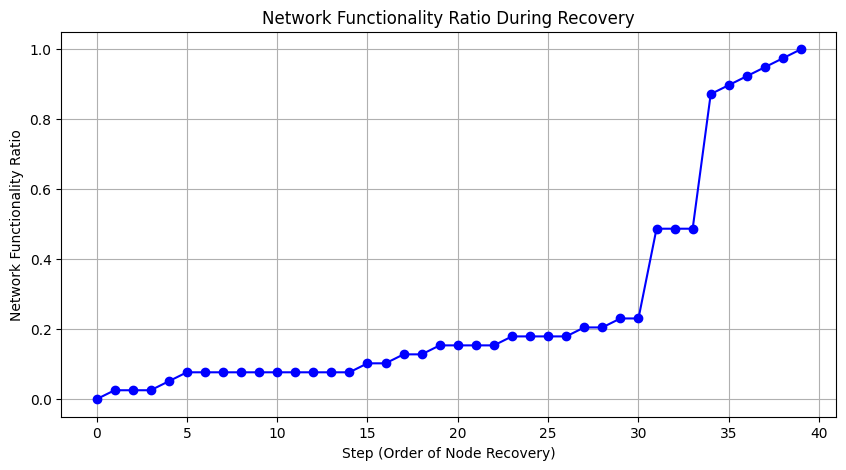

In [26]:
def simulate_recovery_pagerank(G, nodes_to_remove):
    H = copy.deepcopy(G)
    H.remove_nodes_from(nodes_to_remove)
    seq_added_pagerank = []
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = [calculate_network_performance(H) / initial_performance]
    
    # Calculate PageRank centrality for the nodes
    centrality = nx.pagerank(G)
    
    # Sort removed nodes by their centrality in descending order
    nodes_sorted_by_centrality = sorted(nodes_to_remove, key=lambda n: centrality.get(n, 0), reverse=True)
    
    for index, node in enumerate(nodes_sorted_by_centrality):
        H.add_node(node)
        seq_added_pagerank.append(node)
        # Reconnect with neighbors that are still in the graph
        for neighbor in G.neighbors(node):
            if neighbor in H:
                H.add_edge(node, neighbor)
        
        # Calculate current performance and functionality ratio
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        #print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
    
    return recovery_performance, seq_added_pagerank

# Example usage
start_time = time.time()
recovery_performance_pagerank, seq_added_pagerank = simulate_recovery_pagerank(agg_G, nodes_to_remove)
end_time = time.time()
time_taken_pagerank = end_time - start_time

plot_functionality_ratio(recovery_performance_pagerank)

In [27]:
# Domirank Centrality

Functionality after recovering node 1: 0.1282051282051282
Functionality after recovering node 2: 0.1282051282051282
Functionality after recovering node 3: 0.1282051282051282
Functionality after recovering node 4: 0.23076923076923078
Functionality after recovering node 5: 0.2564102564102564
Functionality after recovering node 6: 0.2564102564102564
Functionality after recovering node 7: 0.2564102564102564
Functionality after recovering node 8: 0.2564102564102564
Functionality after recovering node 9: 0.3076923076923077
Functionality after recovering node 10: 0.358974358974359
Functionality after recovering node 11: 0.41025641025641024
Functionality after recovering node 12: 0.41025641025641024
Functionality after recovering node 13: 0.46153846153846156
Functionality after recovering node 14: 0.6153846153846154
Functionality after recovering node 15: 0.717948717948718
Functionality after recovering node 16: 0.7435897435897436
Functionality after recovering node 17: 0.7435897435897436
Func

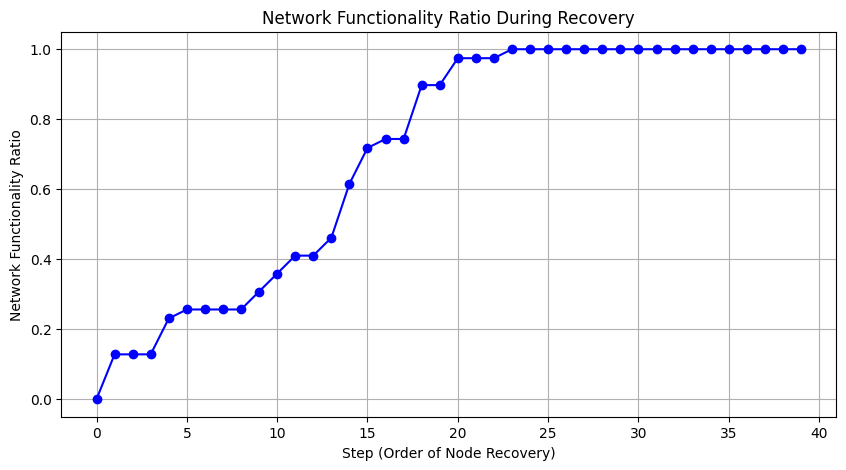

Time taken for DomiRank-based recovery: 0.009168624877929688 seconds


In [28]:
import copy
import numpy as np
import networkx as nx
import time

def domirank(G, sigma=-1, dt=0.1, epsilon=1e-5, maxIter=1000, checkStep=10):
    if isinstance(G, nx.Graph):  # Check if it is a NetworkX graph
        G = nx.to_scipy_sparse_array(G)  # Convert to scipy sparse array if it is a graph
    else:
        G = G.copy()
    if sigma == -1:
        sigma = optimal_sigma(G, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    pGAdj = sigma * G.astype(np.float32)
    Psi = np.zeros(pGAdj.shape[0]).astype(np.float32)
    maxVals = np.zeros(int(maxIter / checkStep)).astype(np.float32)
    dt = np.float32(dt)
    j = 0
    boundary = epsilon * pGAdj.shape[0] * dt
    for i in range(maxIter):
        tempVal = ((pGAdj @ (1 - Psi)) - Psi) * dt
        Psi += tempVal.real
        if i % checkStep == 0:
            if np.abs(tempVal).sum() < boundary:
                break
            maxVals[j] = tempVal.max()
            if i == 0:
                initialChange = maxVals[j]
            if j > 0:
                if maxVals[j] > maxVals[j - 1] and maxVals[j - 1] > maxVals[j - 2]:
                    return False, Psi
            j += 1

    return True, Psi

def find_eigenvalue(G, minVal=0, maxVal=1, maxDepth=100, dt=0.1, epsilon=1e-5, maxIter=100, checkStep=10):
    x = (minVal + maxVal) / G.sum(axis=-1).max()
    minValStored = 0
    for i in range(maxDepth):
        if maxVal - minVal < epsilon:
            break
        if domirank(G, x, dt, epsilon, maxIter, checkStep)[0]:
            minVal = x
            x = (minVal + maxVal) / 2
            minValStored = minVal
        else:
            maxVal = (x + maxVal) / 2
            x = (minVal + maxVal) / 2
        if minVal == 0:
            print(f'Current Interval : [-inf, -{1 / maxVal}]')
        else:
            print(f'Current Interval : [-{1 / minVal}, -{1 / maxVal}]')
    finalVal = (maxVal + minVal) / 2
    return -1 / finalVal

def process_iteration(q, i, sigma, spArray, maxIter, checkStep, dt, epsilon, sampling):
    tf, domiDist = domirank(spArray, sigma, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    domiAttack = generate_attack(domiDist)
    ourTempAttack, __ = network_attack_sampled(spArray, domiAttack, sampling=sampling)
    finalErrors = ourTempAttack.sum()
    q.put(finalErrors)

def optimal_sigma(spArray, endVal=0, startval=0.000001, iterationNo=100, dt=0.1, epsilon=1e-5, maxIter=100, checkStep=10, maxDepth=100, sampling=0):
    if endVal == 0:
        endVal = find_eigenvalue(spArray, maxDepth=maxDepth, dt=dt, epsilon=epsilon, maxIter=maxIter, checkStep=checkStep)
    import multiprocessing as mp
    endval = -0.9999 / endVal
    tempRange = np.arange(startval, endval + (endval - startval) / iterationNo, (endval - startval) / iterationNo)
    processes = []
    q = mp.Queue()
    for i, sigma in enumerate(tempRange):
        p = mp.Process(target=process_iteration, args=(q, i, sigma, spArray, maxIter, checkStep, dt, epsilon, sampling))
        p.start()
        processes.append(p)

    results = []
    for p in processes:
        p.join()
        result = q.get()
        results.append(result)
    finalErrors = np.array(results)
    minEig = np.where(finalErrors == finalErrors.min())[0][-1]
    minEig = tempRange[minEig]
    return minEig, finalErrors

optimal_sigma_value = 0.26


def simulate_recovery_domirank(G, nodes_to_remove):
    H = nx.Graph()
    seq_added_domirank = []
    # Calculate the initial performance for the functionality ratio
    initial_performance = calculate_network_performance(G)
    
    recovery_performance = [calculate_network_performance(H) / initial_performance]
    
    # Calculate DomiRank centrality for the nodes
    converged, domirank_centrality = domirank(nx.to_scipy_sparse_array(G), sigma=optimal_sigma_value)
    if not converged:
        print("Warning: DomiRank calculation did not converge. Results may be inaccurate.")
    
    # Mapping nodes to their DomiRank centrality values
    domirank_dict = {node: domirank_centrality[i] for i, node in enumerate(G.nodes)}
    
    # Sort removed nodes by their centrality in descending order
    nodes_sorted_by_domirank = sorted(nodes_to_remove, key=lambda n: domirank_dict.get(n, 0), reverse=True)
    
    for index, node in enumerate(nodes_sorted_by_domirank):
        H.add_node(node, **G.nodes[node])
        H.add_edges_from(list(G.edges(node)))
        seq_added_domirank.append(node)
        
        # Calculate current performance and functionality ratio
        current_performance = calculate_network_performance(H)
        functionality_ratio = current_performance / initial_performance
        recovery_performance.append(functionality_ratio)
        print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
    
    return recovery_performance, seq_added_domirank


# Example usage
start_time = time.time()
recovery_performance_domirank, seq_added_domirank = simulate_recovery_domirank(agg_G, nodes_to_remove)
end_time = time.time()
time_taken_domirank = end_time - start_time
plot_functionality_ratio(recovery_performance_domirank)

print(f'Time taken for DomiRank-based recovery: {time_taken_domirank} seconds')


## Dynamic Betweenness

In [422]:
# import networkx as nx
# import numpy as np
# import matplotlib.pyplot as plt
# import copy

# def simulate_recovery_dynamic_betweenness(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_betweenness = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     # Initialize the subgraph S with the remaining nodes in H
#     S = set(H.nodes())
#     H_all = set(nodes_to_remove)
#     index=0
#     while H_all:
#         # Identify potential nodes to add from H_all to S
#         potential_add_nodes = list(H_all)
#         betweenness_scores = {}

#         for node in potential_add_nodes:
#             # Calculate the betweenness centrality if the node were added to S
#             test_graph = H.copy()
#             test_graph.add_node(node)
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)
#             betweenness_scores[node] = nx.betweenness_centrality(test_graph)[node]

#         # Add the node with the highest betweenness centrality to S
#         best_node = max(betweenness_scores, key=betweenness_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_betweenness.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)
        
#         # Update the recovery performance
#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index=index+1
#         # Remove the best node from H_all
#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_betweenness

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_betweenness, seq_added_dynamic_betweenness = simulate_recovery_dynamic_betweenness(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_betweenness = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_betweenness)
# print(f'Time taken for Dynamic Betweenness Recovery: {time_taken_dynamic_betweenness} seconds')


# Dynamic Degree

In [423]:
# def simulate_recovery_dynamic_degree(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_degree = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     H_all = set(nodes_to_remove)
#     index = 0

#     while H_all:
#         potential_add_nodes = list(H_all)
#         degree_scores = {node: G.degree[node] for node in potential_add_nodes}

#         # Add the node with the highest degree centrality to the graph
#         best_node = max(degree_scores, key=degree_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_degree.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)

#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index += 1

#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_degree

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_degree, seq_added_dynamic_degree = simulate_recovery_dynamic_degree(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_degree = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_degree)
# print(f'Time taken for Dynamic Degree Recovery: {time_taken_dynamic_degree} seconds')


# Dynamic Closeness

In [424]:
# def simulate_recovery_dynamic_closeness(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_closeness = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     H_all = set(nodes_to_remove)
#     index = 0

#     while H_all:
#         potential_add_nodes = list(H_all)
#         closeness_scores = {}

#         for node in potential_add_nodes:
#             test_graph = H.copy()
#             test_graph.add_node(node)
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)
#             closeness_scores[node] = nx.closeness_centrality(test_graph)[node]

#         # Add the node with the highest closeness centrality to the graph
#         best_node = max(closeness_scores, key=closeness_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_closeness.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)

#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index += 1

#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_closeness

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_closeness, seq_added_dynamic_closeness = simulate_recovery_dynamic_closeness(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_closeness = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_closeness)
# print(f'Time taken for Dynamic Closeness Recovery: {time_taken_dynamic_closeness} seconds')


# Dynamic Eigen Vector

In [425]:
# def simulate_recovery_dynamic_eigenvector(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_eigenvector = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     H_all = set(nodes_to_remove)
#     index = 0

#     while H_all:
#         potential_add_nodes = list(H_all)
#         eigenvector_scores = {}

#         for node in potential_add_nodes:
#             test_graph = H.copy()
#             test_graph.add_node(node)
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)
#             eigenvector_scores[node] = nx.eigenvector_centrality(test_graph, max_iter=5000, tol=1e-06)[node]

#         # Add the node with the highest eigenvector centrality to the graph
#         best_node = max(eigenvector_scores, key=eigenvector_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_eigenvector.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)

#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index += 1

#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_eigenvector

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_eigenvector, seq_added_dynamic_eigenvector = simulate_recovery_dynamic_eigenvector(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_eigenvector = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_eigenvector)
# print(f'Time taken for Dynamic Eigenvector Recovery: {time_taken_dynamic_eigenvector} seconds')


# Dynamic Pagerank

In [426]:
# def simulate_recovery_dynamic_pagerank(G, nodes_to_remove):
#     H = copy.deepcopy(G)
#     H.remove_nodes_from(nodes_to_remove)
#     seq_added_dynamic_pagerank = []
#     initial_performance = calculate_network_performance(G)
#     recovery_performance = [calculate_network_performance(H) / initial_performance]

#     H_all = set(nodes_to_remove)
#     index = 0

#     while H_all:
#         potential_add_nodes = list(H_all)
#         pagerank_scores = {}

#         for node in potential_add_nodes:
#             test_graph = H.copy()
#             test_graph.add_node(node)
#             for neighbor in G.neighbors(node):
#                 if neighbor in test_graph:
#                     test_graph.add_edge(node, neighbor)
#             pagerank_scores[node] = nx.pagerank(test_graph)[node]

#         # Add the node with the highest PageRank to the graph
#         best_node = max(pagerank_scores, key=pagerank_scores.get)
#         H.add_node(best_node)
#         seq_added_dynamic_pagerank.append(best_node)
#         for neighbor in G.neighbors(best_node):
#             if neighbor in H:
#                 H.add_edge(best_node, neighbor)

#         current_performance = calculate_network_performance(H)
#         functionality_ratio = current_performance / initial_performance
#         recovery_performance.append(functionality_ratio)
#         print(f'Functionality after recovering node {index + 1}: {functionality_ratio}')
#         index += 1

#         H_all.remove(best_node)

#     return recovery_performance, seq_added_dynamic_pagerank

# # Example usage
# start_time = time.time()
# recovery_performance_dynamic_pagerank, seq_added_dynamic_pagerank = simulate_recovery_dynamic_pagerank(agg_G, nodes_to_remove)
# end_time = time.time()
# time_taken_dynamic_pagerank = end_time - start_time

# plot_functionality_ratio(recovery_performance_dynamic_pagerank)
# print(f'Time taken for Dynamic PageRank Recovery: {time_taken_dynamic_pagerank} seconds')


In [427]:
    for node, data in list(agg_G.nodes(data=True))[:3]:
        print(f"Node: {node}, Features: {data}")

Node: 155, Features: {}
Node: 158, Features: {}
Node: 156, Features: {}


## Ashis's Trail plots

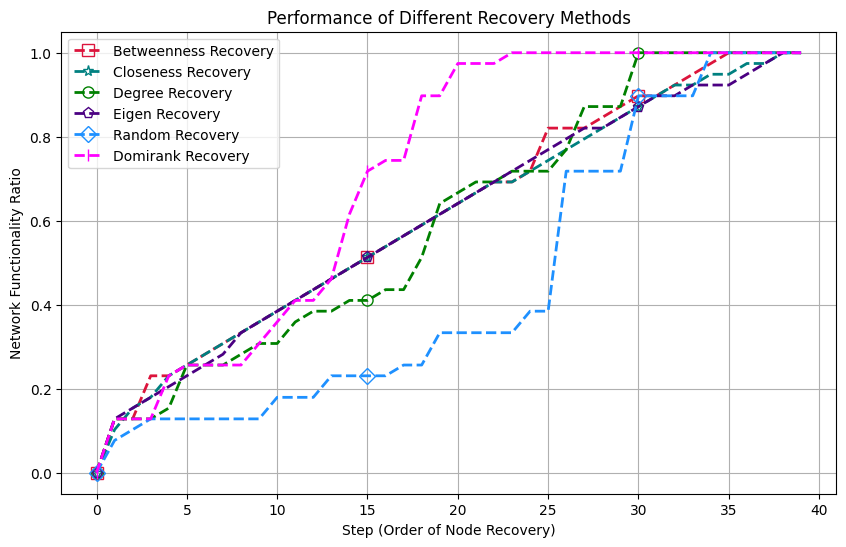

In [29]:
import matplotlib.pyplot as plt
colors = ['crimson', 'teal', 'green','indigo', 'dodgerblue', 'fuchsia']
Q = 2  # Assuming Q is your linewidth
marker_style = ['s', '*', 'o', 'p', 'D', 'x', '|']

# Plot the performance ratios
plt.figure(figsize=(10, 6))
plt.plot(recovery_performance_betweenness, label='Betweenness Recovery',color=colors[0], linestyle='--', marker=marker_style[0], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_closeness, label='Closeness Recovery',color=colors[1], linestyle='--', marker=marker_style[1], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_degree, label='Degree Recovery',color=colors[2], linestyle='--', marker=marker_style[2], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_eigen, label='Eigen Recovery',color=colors[3], linestyle='--', marker=marker_style[3], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_random, label='Random Recovery', color=colors[4], linestyle='--', marker=marker_style[4], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
plt.plot(recovery_performance_domirank, label='Domirank Recovery', color=colors[-1], linestyle='--', marker=marker_style[6], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)
# plt.plot(recovery_performance_flood, label='Flood Recovery', color=colors[5], linestyle='--', marker=marker_style[5], markevery=15, markerfacecolor='none', markersize=8,linewidth=Q)

# plt.plot(recovery_performance_greedy, label='Greedy Recovery', marker='o')
# plt.plot(recovery_performance_domirank, label='Domirank Recovery', marker='o')
# plt.plot(recovery_performance_dynamic_domirank, label='Dynamic Domirank Recovery', marker='o')
# plt.plot(recovery_performance_dynamic_eigen, label='Dynamic Eigen Recovery', marker='o')
# plt.plot(recovery_performance_dynamic_degree, label='Dynamic Degree Recovery', marker='o')
# plt.plot(recovery_performance_dynamic_closeness, label='Dynamic Closeness Recovery', marker='o')
# plt.plot(recovery_performance_dynamic_betweenness, label='Dynamic Betweenness Recovery', marker='o')

# Set labels and title
plt.xlabel('Step (Order of Node Recovery)')
plt.ylabel('Network Functionality Ratio')
plt.title('Performance of Different Recovery Methods')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [30]:
def plot_area_recovery(recovery_performance, type):
    # Scale the ratios between 0 and 1
    max_ratio = max(recovery_performance)
    scaled_ratios = [ratio / max_ratio for ratio in recovery_performance]

    steps = list(range(1, len(scaled_ratios) + 1))
    
    # Calculate the area using the trapezoidal rule
    area = np.trapz(scaled_ratios, steps)
    
    # Normalize the area between 0 and 1
    normalized_area = (area / len(scaled_ratios))
    
    print(f'Normalized area under the {type} Recovery curve: {normalized_area:.2f}')  # Print with two decimal places
    
# # Usage example:
# # recovery_performance = ... (however you obtain this list)
plot_area_recovery(recovery_performance_betweenness, "Betweenness")
plot_area_recovery(recovery_performance_domirank, "Domi Rank")
plot_area_recovery(recovery_performance_degree, "Degree")
# plot_area_recovery(recovery_performance_greedy, "Greedy")
plot_area_recovery(recovery_performance_closeness, "Closeness")
plot_area_recovery(recovery_performance_eigen, "Eigen")
plot_area_recovery(recovery_performance_random, "Random")
# plot_area_recovery(recovery_performance_dynamic_domirank, "Dynamic Domi Rank")
# plot_area_recovery(recovery_performance_dynamic_degree, "Dynamic Degree")
# plot_area_recovery(recovery_performance_dynamic_betweenness, "Dynamic Betweeness")
# plot_area_recovery(recovery_performance_dynamic_eigenvector, "Dynamic Eigen")
# plot_area_recovery(recovery_performance_dynamic_closeness, "Dynamic Closeness Rank")

Normalized area under the Betweenness Recovery curve: 0.60
Normalized area under the Domi Rank Recovery curve: 0.69
Normalized area under the Degree Recovery curve: 0.58
Normalized area under the Closeness Recovery curve: 0.59
Normalized area under the Eigen Recovery curve: 0.59
Normalized area under the Random Recovery curve: 0.44
